In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sys, time

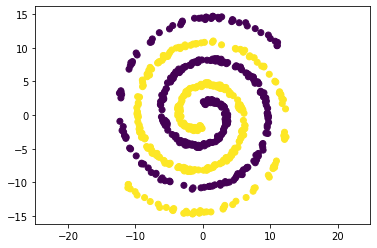

In [51]:
data_size = 333
if (data_size > 750):
    sys.setrecursionlimit(10**6)
dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()


def twospirals(n_points, noise=.5):
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

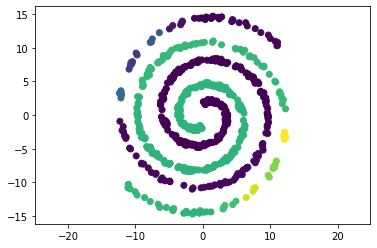

[NORMALIZED RUNTIME] = 1.2381305694580078 seconds
[ACTUAL RUNTIME]     = 1.2384328842163086 seconds
[MIN_P]              = 1
[EPSILON]            = 1.5
--------------------------------------------


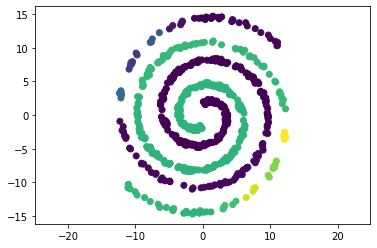

[NORMALIZED RUNTIME] = 1.4113452434539795 seconds
[ACTUAL RUNTIME]     = 0.17307496070861816 seconds
[MIN_P]              = 2
[EPSILON]            = 1.5
--------------------------------------------


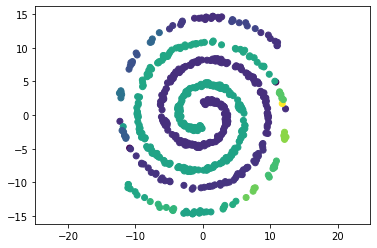

[NORMALIZED RUNTIME] = 1.599181890487671 seconds
[ACTUAL RUNTIME]     = 0.1876389980316162 seconds
[MIN_P]              = 3
[EPSILON]            = 1.5
--------------------------------------------


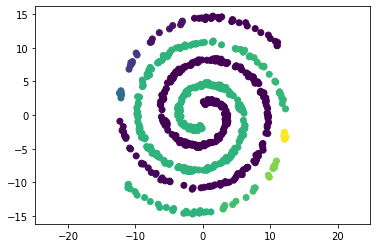

[NORMALIZED RUNTIME] = 2.874264717102051 seconds
[ACTUAL RUNTIME]     = 1.2749369144439697 seconds
[MIN_P]              = 1
[EPSILON]            = 1.7
--------------------------------------------


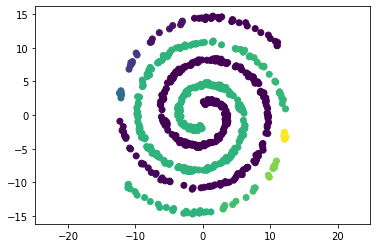

[NORMALIZED RUNTIME] = 3.0400681495666504 seconds
[ACTUAL RUNTIME]     = 0.1666121482849121 seconds
[MIN_P]              = 2
[EPSILON]            = 1.7
--------------------------------------------


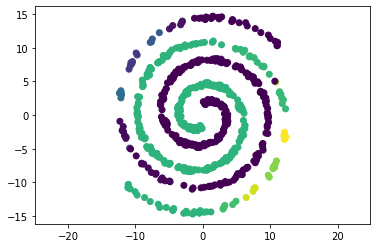

[NORMALIZED RUNTIME] = 3.2098586559295654 seconds
[ACTUAL RUNTIME]     = 0.1684706211090088 seconds
[MIN_P]              = 3
[EPSILON]            = 1.7
--------------------------------------------


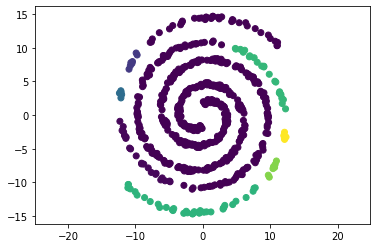

[NORMALIZED RUNTIME] = 4.52347993850708 seconds
[ACTUAL RUNTIME]     = 1.3135814666748047 seconds
[MIN_P]              = 1
[EPSILON]            = 1.9
--------------------------------------------


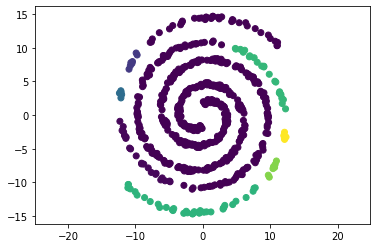

[NORMALIZED RUNTIME] = 4.68811297416687 seconds
[ACTUAL RUNTIME]     = 0.16945600509643555 seconds
[MIN_P]              = 2
[EPSILON]            = 1.9
--------------------------------------------


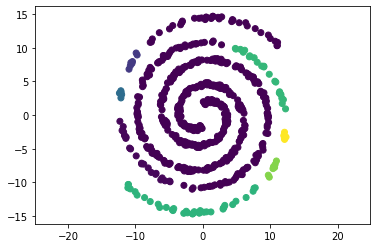

[NORMALIZED RUNTIME] = 4.862938404083252 seconds
[ACTUAL RUNTIME]     = 0.16856718063354492 seconds
[MIN_P]              = 3
[EPSILON]            = 1.9
--------------------------------------------


In [52]:
class DBSCAN():  
    #Executes every other function, tracks time needed
    #and labels rare cases directly as noise to safe some time.

    #MIN_P <- [0,...,n]: DBSCAN for every given min_p (min_p = neighbours needed for points to be a core)
    #EPS <- [0,...,n]: DBSCAN for every given epsilon (epsilon = maximal distance to an point to be considered neighbours)
    #TESTING_FLAGS <-[0|1,0|1]: [0] 1 plots cluster, [1] 1 prints runtime/min_p/eps
    def main_cluster(self, MIN_P = [2], EPS = [1.7], TESTING_FLAGS = [1,1]):
        global labeled_set
        timer, s_timer = time.time(), time.time()
        for k in EPS:
            sym_set = self.sym_neighbour(self.sorted_distances(k))
            for i in MIN_P:
                c, labeled_set = -1, [None]*data_size*2                                     #Init for loop counter and labeling array
                for x in sym_set:
                    c += 1
                    if (x == [] and labeled_set[c] is None):
                        labeled_set[c] = [-99,-1]  
                        continue                                                            #[-99,-1] = noise
                    elif (labeled_set[c] is not None):
                        continue
                    else:
                        self.label(c, sym_set[c], sym_set, i)
                if (TESTING_FLAGS[0]):
                    self.scatter_plotting(labeled_set)
                if (TESTING_FLAGS[1]):
                    print("[NORMALIZED RUNTIME] =", time.time() - timer, "seconds")
                    print("[ACTUAL RUNTIME]     =", time.time() - s_timer , "seconds")
                    print("[MIN_P]              =", i)
                    print("[EPSILON]            =", k)
                s_timer = time.time()
                print("--------------------------------------------")

    
    def scatter_plotting(self, labeled_set):
        plt.scatter(dataset[:,0], dataset[:,1], c = [x[0] for x in labeled_set])
        plt.axis('equal')
        plt.show()

    def plotter(self, x, y, xlabel, ylabel):
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    #Depicts every point to labeled_set as noise, corepoint or borderpoint, 
    #depending what values are stored in labeled_set already and how label() 
    #was called.

    #c = center (point which will be determined as noise/core/border)
    #sub_set = Index of every neighbour of c 
    #sym_set = Matrix where every neighbour relation is stored
    #min_p = How many neighbours are needed for c to become an core
    #depth = Flag, if label was called by an center to look if neighbours are already cores
    #overwriter = Classifies cores/borderpoints as one entity
    def label(self, c, sub_set, sym_set, min_p, depth = 0, overwriter = -1) -> [int]:
        if (len(sub_set) < min_p):
            if (depth == 0):                                                        #Checking if neighbours are (or will be) core-points
                for i in sub_set:                                               
                    if (labeled_set[i] is not None and labeled_set[i][1] == 0):     #Mimics neighbour if it was an core-point and makes itself an border-point
                        labeled_set[c] = [labeled_set[i][0],1]
                        return()
                    z = (self.label(i, sym_set[i], sym_set, min_p, 1))              #Hardchecks if an neighbour could become an core-point
                    if (z[1]!=0):
                        continue
                    else:                                                           #If it was, makes itself an border-point and said neighbour an core-point
                        labeled_set[c] = [z[1],1]
                        return ()
                labeled_set[c] = [-99,-1]                                           #If not, then it will be marked as noise
            return([0,-1])                                                          #Noise-flag if checks were unsuccessful for len(sub_set) < min_p && depth == 1
        if (depth == 1):
            if (labeled_set[c] is not None):
                return (labeled_set[c])
            labeled_set[c] = [c,0]
            return (labeled_set[c])
        if (overwriter != -1):                                                      #Overwrites c with overwriter for labeling
            labeled_set[c] = [overwriter,0]
        else:
            labeled_set[c] = [c,0]
        for i in sub_set:
            if (labeled_set[i] is None and overwriter == -1):                       #Needed if core-point detected another core-point to mark it as one of its own
                self.label(i, sym_set[i], sym_set, min_p, 0, c)
            elif (labeled_set[i] is None):
                self.label(i, sym_set[i], sym_set, min_p, 0, overwriter)

    #Mirrors index-entries of points with their corresponding neighbour
    #(DBSCAN could be done without it to further improve runtime by 5-10%)

    #comp_set = Output of sorted_distances
    def sym_neighbour(self, comp_set) -> [[int],[int],...]:                         # Mirroring Neighbour values
        c = len(comp_set)
        reversed_comp_set = list(reversed(comp_set))                                # Needs to be reversed to avoid duplicates due to array order
        for i in reversed_comp_set:
            c -= 1
            if (i == []):
                continue
            try:
                for n in i:
                    comp_set[n].append(c)
            except:
                pass
        return(comp_set)
    
    #Calculates the euclidean distance of point n to every other point, 
    #indexes said other point and saves only the index of point n+i, if the distance
    #is <= than eps, in comp_set. This process will be repeated for every other point
    #but due the symmetric property of neighbourhood, we only need to calculate
    #every point after n, effectively halving the calculation time needed

    #eps = maximal distance to an point to be considered neighbours
    def sorted_distances(self, eps) -> [[[int,int],[int,int],...],...]:             #Returns list of indexed ordered distances of every point 
        comp_set,euclid_set = [], []
        for i in range(data_size*2):                                                #Calc. Euc.distance of x against every other point minus the points already calculated to halve calc. time
            for n in range(data_size*2-i-1):
                euclid_set.append([np.sqrt(((dataset[i][0] - dataset[n+i+1][0])**2) + (dataset[i][1] - dataset[n+i+1][1])**2),(n+i+1)])
            comp_set.append([x[1] for x in sorted(euclid_set) if x[0]<=eps])        #Only appending values if the distance is smaller than epsilon
            euclid_set = []
        return(comp_set)

#Main_cluster is the method to test this code.
#MIN_P <- [0,...,n]: DBSCAN for every given min_p (min_p = neighbours needed for points to be a core)
#EPS <- [0,...,n]: DBSCAN for every given epsilon (epsilon = maximal distance to an point to be considered neighbours)
#TESTING_FLAGS <-[0|1,0|1]: [0] 1 plots cluster, [1] 1 prints runtime/min_p/eps
db = DBSCAN()
db.main_cluster([1,2,3], [1.5,1.7,1.9], [1,1])